In [31]:
import pandas as pd
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [2]:
import lightgbm as lgb

# LightGBM model and parameters

In [144]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 31
params['min_data'] = 50
params['max_depth'] = 10
params['device'] = 'cpu' 

In [146]:
# Prepare datasets
X = pd.read_csv('data/home_bureau/train_app_bureau_merged.csv')
test_data = pd.read_csv('data/home_bureau/test_app_bureau_merged.csv')
Y  = X['TARGET']
X  = X.drop(columns=['TARGET'],axis=1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [148]:
d_train = lgb.Dataset(X_train, label=y_train)

In [149]:
clf = lgb.train(params, d_train, 100)

In [150]:
y_pred=clf.predict(X_test)

In [151]:
type(y_test.values)
fpr, tpr, thresholds = roc_curve(y_test.values,y_pred)

In [152]:
auc(fpr, tpr)

0.7298677324977226

# Predict test data


In [153]:
predict_data = clf.predict(test_data)

In [154]:
df_pred = pd.DataFrame(predict_data)
df_pred['SK_ID_CURR'] =test_data['SK_ID_CURR']
df_pred.head()

,0,SK_ID_CURR
0,0.392201,100001
1,0.396310,100005
2,0.381604,100013
3,0.383851,100028
4,0.399673,100038


In [155]:
df_pred.set_index('SK_ID_CURR',inplace=True)
df_pred.rename(columns={0:'TARGET'},inplace=True)

In [156]:
df_pred.head()

,TARGET
SK_ID_CURR,
100001,0.392201
100005,0.396310
100013,0.381604
100028,0.383851
100038,0.399673


In [157]:
df_pred.to_csv('test output/pred_bureu_lbm_second.csv',index=True)

# XGBoost Model

In [136]:
from xgboost import XGBClassifier
import numpy as np

In [101]:
# Prepare datasets
X = pd.read_csv('data/app_train_processed.csv')
test_data = pd.read_csv('data/app_test_processed.csv')
Y  = X['TARGET']
X  = X.drop(columns=['TARGET'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
# Create a xgboost model
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
y_predict = model.predict_proba(X_test)

In [141]:
fpr, tpr, thresholds = roc_curve(y_test.values,y_pred)

In [142]:
auc(fpr, tpr)

0.7423986911430639

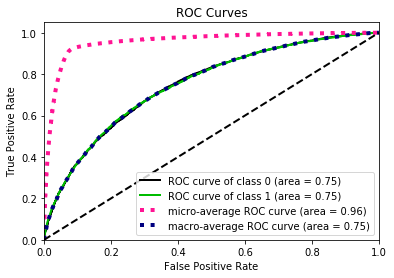

In [143]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test.values, y_predict)
plt.show()